# How Can a Wellness Technology Company Play It Smart at BellaBeat?
## Lewis Rincon Castano
## Data analysis project from the Google Data Analytics certificate

### Exploratory Data Analysis

### Observation notes:
From the below tables,  we can find our datasets information types for each of our four tables; their description tables with infromation about variables: mean, median, mode, and more; missing and unique values, correlation tables, and a KNN imputation method for the weightLogInfo_merged table.

In [1]:
# Import libraries
import pandas as pd # for data exploration and cleaning
import os # change and find working directory
import csv # open csv files
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # for data exploration and cleaning
from sklearn.impute import KNNImputer # import the KNNimputer class
import random # import random seed to keep our machine learning input values constant

# Get the current working directory
new_directory = '/Users/lewis/Desktop/Fitabase Data 4.12.16-5.12.16'

# Change the working directory
os.chdir(new_directory)

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: C:\Users\lewis\Desktop\Fitabase Data 4.12.16-5.12.16


## dailyActivity_merged Dataset

In [2]:
# Open the CSV file
dailyActivity_merged = pd.read_csv('dailyActivity_merged.csv')
# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.5f}'.format)

# Print columns data types
dailyActivity_merged.head()


# Print columns data types
dailyActivity_merged.info()
# Print columns data types
dailyActivity_merged.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776


In [3]:
# Split "Date" column into three parts
new=dailyActivity_merged['ActivityDate'].str.split(expand=True)
new # temp table
dailyActivity_merged['date']=new[0] # moving column data to the main table


dailyActivity_merged = dailyActivity_merged.drop('ActivityDate', axis=1) # drop "Date" variable
dailyActivity_merged

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
0,1503960366,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985,4/12/2016
1,1503960366,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797,4/13/2016
2,1503960366,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776,4/14/2016
3,1503960366,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745,4/15/2016
4,1503960366,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863,4/16/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,10686,8.11000,8.11000,0.00000,1.08000,0.20000,6.80000,0.00000,17,4,245,1174,2847,5/8/2016
936,8877689391,20226,18.25000,18.25000,0.00000,11.10000,0.80000,6.24000,0.05000,73,19,217,1131,3710,5/9/2016
937,8877689391,10733,8.15000,8.15000,0.00000,1.35000,0.46000,6.28000,0.00000,18,11,224,1187,2832,5/10/2016
938,8877689391,21420,19.56000,19.56000,0.00000,13.22000,0.41000,5.89000,0.00000,88,12,213,1127,3832,5/11/2016


In [4]:
dailyActivity_merged['date'] = pd.to_datetime(dailyActivity_merged['date'], format='%m/%d/%Y') # change datatype object to datetime

# Print columns data types
dailyActivity_merged.info()
# Print describe table
dailyActivity_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   TotalSteps                940 non-null    int64         
 2   TotalDistance             940 non-null    float64       
 3   TrackerDistance           940 non-null    float64       
 4   LoggedActivitiesDistance  940 non-null    float64       
 5   VeryActiveDistance        940 non-null    float64       
 6   ModeratelyActiveDistance  940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   SedentaryActiveDistance   940 non-null    float64       
 9   VeryActiveMinutes         940 non-null    int64         
 10  FairlyActiveMinutes       940 non-null    int64         
 11  LightlyActiveMinutes      940 non-null    int64         
 12  SedentaryMinutes      

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000
mean,4855407369.33298,7637.91064,5.48970,5.47535,0.10817,1.50268,0.56754,3.34082,0.00161,21.16489,13.56489,192.81277,991.21064,2303.60957
std,2424805475.65796,5087.15074,3.92461,3.90728,0.61990,2.65894,0.88358,2.04066,0.00735,32.84480,19.98740,109.17470,301.26744,718.16686
min,1503960366.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2320127002.00000,3789.75000,2.62000,2.62000,0.00000,0.00000,0.00000,1.94500,0.00000,0.00000,0.00000,127.00000,729.75000,1828.50000
50%,4445114986.00000,7405.50000,5.24500,5.24500,0.00000,0.21000,0.24000,3.36500,0.00000,4.00000,6.00000,199.00000,1057.50000,2134.00000
75%,6962181067.00000,10727.00000,7.71250,7.71000,0.00000,2.05250,0.80000,4.78250,0.00000,32.00000,19.00000,264.00000,1229.50000,2793.25000
max,8877689391.00000,36019.00000,28.03000,28.03000,4.94214,21.92000,6.48000,10.71000,0.11000,210.00000,143.00000,518.00000,1440.00000,4900.00000


In [5]:
# Print describe table
dailyActivity_merged.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000
mean,4855407369.33298,7637.91064,5.48970,5.47535,0.10817,1.50268,0.56754,3.34082,0.00161,21.16489,13.56489,192.81277,991.21064,2303.60957
std,2424805475.65796,5087.15074,3.92461,3.90728,0.61990,2.65894,0.88358,2.04066,0.00735,32.84480,19.98740,109.17470,301.26744,718.16686
min,1503960366.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2320127002.00000,3789.75000,2.62000,2.62000,0.00000,0.00000,0.00000,1.94500,0.00000,0.00000,0.00000,127.00000,729.75000,1828.50000
50%,4445114986.00000,7405.50000,5.24500,5.24500,0.00000,0.21000,0.24000,3.36500,0.00000,4.00000,6.00000,199.00000,1057.50000,2134.00000
75%,6962181067.00000,10727.00000,7.71250,7.71000,0.00000,2.05250,0.80000,4.78250,0.00000,32.00000,19.00000,264.00000,1229.50000,2793.25000
max,8877689391.00000,36019.00000,28.03000,28.03000,4.94214,21.92000,6.48000,10.71000,0.11000,210.00000,143.00000,518.00000,1440.00000,4900.00000


## heartrate_seconds_merged Dataset

In [6]:
# Open the second CSV file
heartrate_seconds_merged = pd.read_csv('heartrate_seconds_merged.csv')
# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.5f}'.format)

# Print columns data types
heartrate_seconds_merged.info()
# Print columns data types
heartrate_seconds_merged.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105


In [7]:
# Split "Date" column into three parts
new=heartrate_seconds_merged['Time'].str.split(expand=True)
new # temp table
heartrate_seconds_merged['date']=new[0] # moving column data to the main table
heartrate_seconds_merged['time']=new[1] # moving column data to the main table
heartrate_seconds_merged['AM/PM']=new[2] # moving column data to the main table

heartrate_seconds_merged = heartrate_seconds_merged.drop('Time', axis=1) # drop "Date" variable
heartrate_seconds_merged


,Id,Value,date,time,AM/PM
0,2022484408,97,4/12/2016,7:21:00,AM
1,2022484408,102,4/12/2016,7:21:05,AM
2,2022484408,105,4/12/2016,7:21:10,AM
3,2022484408,103,4/12/2016,7:21:20,AM
4,2022484408,101,4/12/2016,7:21:25,AM
...,...,...,...,...,...
2483653,8877689391,57,5/12/2016,2:43:53,PM
2483654,8877689391,56,5/12/2016,2:43:58,PM
2483655,8877689391,55,5/12/2016,2:44:03,PM
2483656,8877689391,55,5/12/2016,2:44:18,PM


In [8]:
heartrate_seconds_merged['date'] = pd.to_datetime(heartrate_seconds_merged['date'], format='%m/%d/%Y') # change datatype object to datetime
heartrate_seconds_merged['time'] = pd.to_datetime(heartrate_seconds_merged['time']) # change datatype object to datetime
heartrate_seconds_merged['AM/PM'] = heartrate_seconds_merged['AM/PM'].astype('category')

# Print columns data types
heartrate_seconds_merged.info()
# Print describe table
heartrate_seconds_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Value   int64         
 2   date    datetime64[ns]
 3   time    datetime64[ns]
 4   AM/PM   category      
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 78.2 MB


,Id,Value
count,2483658.00000,2483658.00000
mean,5513764629.40340,77.32842
std,1950223760.95364,19.40450
min,2022484408.00000,36.00000
25%,4388161847.00000,63.00000
50%,5553957443.00000,73.00000
75%,6962181067.00000,88.00000
max,8877689391.00000,203.00000


## sleepDay_merged Dataset

In [9]:
# Open the third CSV file
sleepDay_merged = pd.read_csv('sleepDay_merged.csv')
# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.5f}'.format)

# Print columns data types
sleepDay_merged.info()
# Print columns data types
sleepDay_merged.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442


In [10]:
# Print describe and info tables
sleepDay_merged.info()
sleepDay_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.00000,413.00000,413.00000,413.00000
mean,5000979403.21307,1.11864,419.46731,458.63923
std,2060360173.74404,0.34552,118.34468,127.10161
min,1503960366.00000,1.00000,58.00000,61.00000
25%,3977333714.00000,1.00000,361.00000,403.00000
50%,4702921684.00000,1.00000,433.00000,463.00000
75%,6962181067.00000,1.00000,490.00000,526.00000
max,8792009665.00000,3.00000,796.00000,961.00000


In [11]:
# Split "sleepDay" column into three parts
new=sleepDay_merged['SleepDay'].str.split(expand=True)
new # temp table
sleepDay_merged['date']=new[0] # moving column data to the main table
sleepDay_merged['time']=new[1] # moving column data to the main table
sleepDay_merged['AM/PM']=new[2] # moving column data to the main table

sleepDay_merged = sleepDay_merged.drop('SleepDay', axis=1) # drop "Date" variable
sleepDay_merged

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,time,AM/PM
0,1503960366,1,327,346,4/12/2016,12:00:00,AM
1,1503960366,2,384,407,4/13/2016,12:00:00,AM
2,1503960366,1,412,442,4/15/2016,12:00:00,AM
3,1503960366,2,340,367,4/16/2016,12:00:00,AM
4,1503960366,1,700,712,4/17/2016,12:00:00,AM
...,...,...,...,...,...,...,...
408,8792009665,1,343,360,4/30/2016,12:00:00,AM
409,8792009665,1,503,527,5/1/2016,12:00:00,AM
410,8792009665,1,415,423,5/2/2016,12:00:00,AM
411,8792009665,1,516,545,5/3/2016,12:00:00,AM


In [12]:
sleepDay_merged['date'] = pd.to_datetime(sleepDay_merged['date'], format='%m/%d/%Y') # change datatype object to datetime
sleepDay_merged['time'] = pd.to_datetime(sleepDay_merged['time']) # change datatype object to datetime
sleepDay_merged['AM/PM'] = sleepDay_merged['AM/PM'].astype('category')

In [13]:
# Print columns data types
sleepDay_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   TotalSleepRecords   413 non-null    int64         
 2   TotalMinutesAsleep  413 non-null    int64         
 3   TotalTimeInBed      413 non-null    int64         
 4   date                413 non-null    datetime64[ns]
 5   time                413 non-null    datetime64[ns]
 6   AM/PM               413 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(4)
memory usage: 20.0 KB


## weightLogInfo_merged Dataset

In [14]:
# Open the forth CSV file
weightLogInfo_merged = pd.read_csv('weightLogInfo_merged.csv')
# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.5f}'.format)

# Print columns data types
weightLogInfo_merged.info()
# Print columns data types
weightLogInfo_merged.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.60000,115.96315,22.00000,22.65000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.60000,115.96315,NaN,22.65000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.50000,294.31712,NaN,47.54000,False,1460509732000


In [15]:
# Split "Date" column into three parts
new=weightLogInfo_merged['Date'].str.split(expand=True)
new # temp table
weightLogInfo_merged['date']=new[0] # moving column data to the main table
weightLogInfo_merged['time']=new[1] # moving column data to the main table
weightLogInfo_merged['AM/PM']=new[2] # moving column data to the main table

weightLogInfo_merged = weightLogInfo_merged.drop('Date', axis=1) # drop "Date" variable
weightLogInfo_merged

,Id,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,date,time,AM/PM
0,1503960366,52.60000,115.96315,22.00000,22.65000,True,1462233599000,5/2/2016,11:59:59,PM
1,1503960366,52.60000,115.96315,NaN,22.65000,True,1462319999000,5/3/2016,11:59:59,PM
2,1927972279,133.50000,294.31712,NaN,47.54000,False,1460509732000,4/13/2016,1:08:52,AM
3,2873212765,56.70000,125.00210,NaN,21.45000,True,1461283199000,4/21/2016,11:59:59,PM
4,2873212765,57.30000,126.32487,NaN,21.69000,True,1463097599000,5/12/2016,11:59:59,PM
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,85.00000,187.39292,NaN,25.44000,False,1462517015000,5/6/2016,6:43:35,AM
63,8877689391,85.40000,188.27478,NaN,25.56000,False,1462692953000,5/8/2016,7:35:53,AM
64,8877689391,85.50000,188.49523,NaN,25.61000,False,1462775984000,5/9/2016,6:39:44,AM
65,8877689391,85.40000,188.27478,NaN,25.56000,False,1462949507000,5/11/2016,6:51:47,AM


In [16]:
weightLogInfo_merged['date'] = pd.to_datetime(weightLogInfo_merged['date'], format='%m/%d/%Y') # change datatype object to datetime



In [17]:
# Print columns data types
weightLogInfo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   WeightKg        67 non-null     float64       
 2   WeightPounds    67 non-null     float64       
 3   Fat             2 non-null      float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
 7   date            67 non-null     datetime64[ns]
 8   time            67 non-null     object        
 9   AM/PM           67 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 4.9+ KB


## Missing, Unique, and Correlation per Table

In [18]:
print("Amount of Missing Values")
print(dailyActivity_merged.isnull().sum()) # none missing values

# Add a separator line
print("-" * 40)
print("Amount of Unique Values")
dailyActivity_merged.nunique()


Amount of Missing Values
Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
date                        0
dtype: int64
----------------------------------------
Amount of Unique Values


Id                           33
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
date                         31
dtype: int64

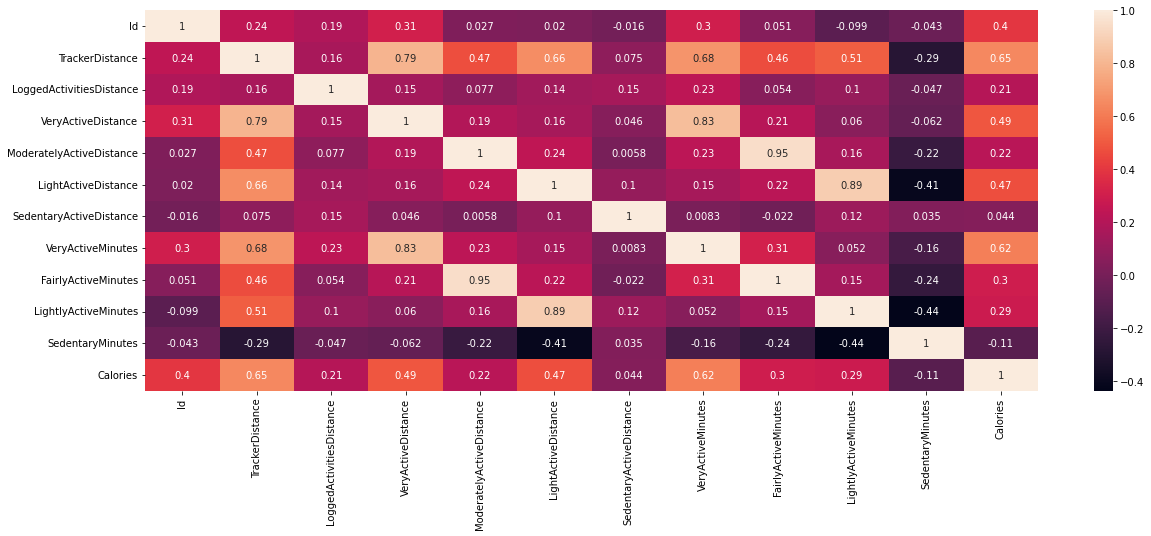

In [30]:
# Print Correlation table

sns.heatmap(dailyActivity_merged.corr(), annot = True)

plt.rcParams['figure.figsize'] = (50,25)

plt.show()

We will be using the "calories" column as a dependent variable. This one is highly and positive correlated to "trackerDistance" and "VeryActiveMinutes." This means that the higher amount of burn calories are correlated to a higher physical activity.

In [20]:
print("Amount of Missing Values")
print(heartrate_seconds_merged.isnull().sum()) # none missing values

# Add a separator line
print("-" * 40)
print("Amount of Unique Values")
heartrate_seconds_merged.nunique()

Amount of Missing Values
Id       0
Value    0
date     0
time     0
AM/PM    0
dtype: int64
----------------------------------------
Amount of Unique Values


Id          14
Value      168
date        31
time     43200
AM/PM        2
dtype: int64

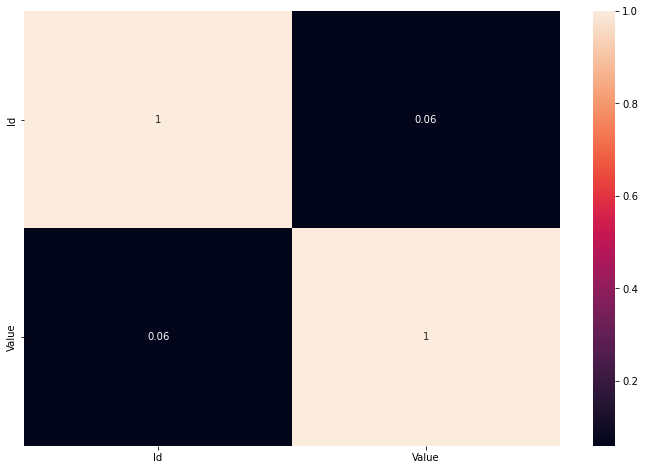

In [21]:
# Print Correlation table

sns.heatmap(heartrate_seconds_merged.corr(), annot = True)

plt.rcParams['figure.figsize'] = (100,7)

plt.show()

There is not a significant correlation between the above variables.

In [22]:
print("Amount of Missing Values")
print(sleepDay_merged.isnull().sum()) # none missing values

# Add a separator line
print("-" * 40)
print("Amount of Unique Values")
sleepDay_merged.nunique()

Amount of Missing Values
Id                    0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
date                  0
time                  0
AM/PM                 0
dtype: int64
----------------------------------------
Amount of Unique Values


Id                     24
TotalSleepRecords       3
TotalMinutesAsleep    256
TotalTimeInBed        242
date                   31
time                    1
AM/PM                   1
dtype: int64

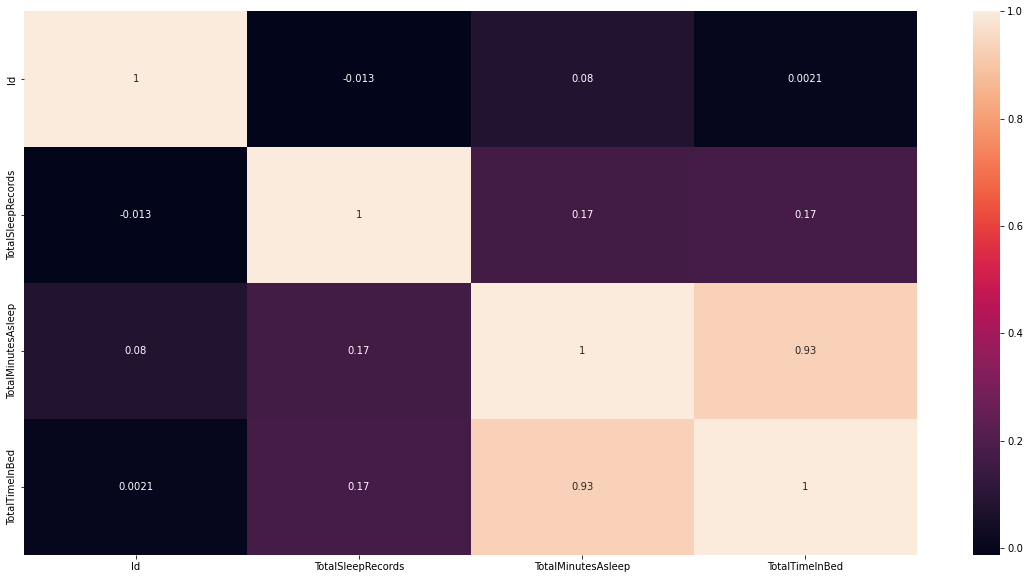

In [35]:
# Print Correlation table

sns.heatmap(sleepDay_merged.corr(), annot = True)
plt.show()

The variables between "totalMinutesAsleep" and "totalTimeInBed" are highly and postive correlated.

In [24]:
print("Amount of Missing Values")
print(weightLogInfo_merged.isnull().sum()) # we have 65 missing values for the "Fat" variable

Amount of Missing Values
Id                 0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
date               0
time               0
AM/PM              0
dtype: int64


In [25]:
# Set the random seed
random.seed(10)
np.random.seed(10)

# Select variables to exclude from imputation
df = weightLogInfo_merged
exclude_vars = ['date', 'time', 'AM/PM']

# Create a new DataFrame with variables to be imputed
impute_df = df.drop(exclude_vars, axis=1)

# Perform KNN imputation only on selected variables
imputer = KNNImputer(n_neighbors=2)
imputed_values = imputer.fit_transform(impute_df)

# Update the original DataFrame with imputed values
df[impute_df.columns] = imputed_values

print(df)



                 Id  WeightKg  WeightPounds      Fat      BMI  IsManualReport  \
0  1503960366.00000  52.60000     115.96315 22.00000 22.65000         1.00000   
1  1503960366.00000  52.60000     115.96315 23.50000 22.65000         1.00000   
2  1927972279.00000 133.50000     294.31712 23.50000 47.54000         0.00000   
3  2873212765.00000  56.70000     125.00210 23.50000 21.45000         1.00000   
4  2873212765.00000  57.30000     126.32487 23.50000 21.69000         1.00000   
..              ...       ...           ...      ...      ...             ...   
62 8877689391.00000  85.00000     187.39292 23.50000 25.44000         0.00000   
63 8877689391.00000  85.40000     188.27478 23.50000 25.56000         0.00000   
64 8877689391.00000  85.50000     188.49523 23.50000 25.61000         0.00000   
65 8877689391.00000  85.40000     188.27478 23.50000 25.56000         0.00000   
66 8877689391.00000  84.00000     185.18830 23.50000 25.14000         0.00000   

                 LogId     

In [26]:
# Check if there are missing values in the dataset
has_missing_values = df.isnull().any().any()

# Print the result
print("Missing data: ", has_missing_values)

Missing data:  False


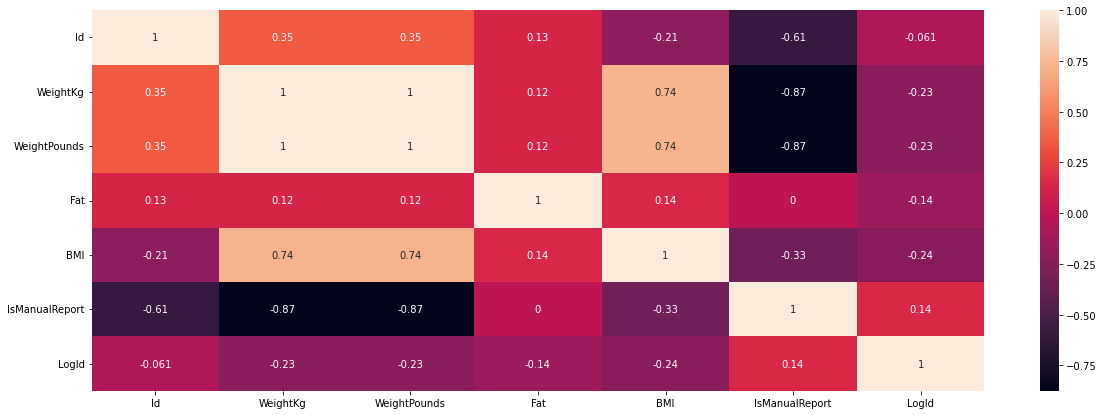

In [27]:
# Print Correlation table
weightLogInfo_merged = df
sns.heatmap(weightLogInfo_merged.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

From above variables, "BMI" is highly and positive correlated to the weights variables. BMI stands for Body Mass Index. It is a numerical value calculated using a person's weight and height. It is a widely used measurement to assess whether a person has a healthy body weight in relation to their height.

In [28]:
# Remove columns that are not going to be use on the machine learning models
dailyActivity_merged = dailyActivity_merged.drop(['TotalSteps', 'TotalDistance'], axis=1)# redundant and highly correlated variables; we have Trackdistance

heartrate_seconds_merged = heartrate_seconds_merged.drop(['time', 'AM/PM'], axis=1)# These variables are not going to be use

sleepDay_merged = sleepDay_merged.drop(['time', 'AM/PM'], axis=1)# These variables are not going to be use

weightLogInfo_merged = weightLogInfo_merged.drop(['time', 'AM/PM'], axis=1)# These variables are not going to be use
weightLogInfo_merged = weightLogInfo_merged.drop(['WeightKg'], axis=1) # redundant and highly correlated variable; we have WeightPounds

## Save datasets as an Excel File

In [29]:
# Save the datasets as an Excel files
dailyActivity_merged.to_csv('dailyActivity_merged_v2.csv', index=False) 
heartrate_seconds_merged.to_csv('heartrate_seconds_merged_v2.csv', index=False)
sleepDay_merged.to_csv('sleepDay_merged_v2.csv', index=False)
weightLogInfo_merged.to_csv('weightLogInfo_merged_v2.csv', index=False)